In [1]:
from shapely.geometry import Point
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [6]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
promise_zones.head()

epsg:2274


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


In [7]:
type(promise_zones)

geopandas.geodataframe.GeoDataFrame

In [8]:
promise_zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6 non-null      int64   
 1   ZONE_ID     6 non-null      int64   
 2   SHAPE_STAr  6 non-null      float64 
 3   SHAPE_STLe  6 non-null      float64 
 4   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 368.0 bytes


In [25]:
promise_zones.plot;

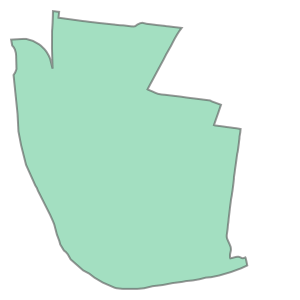

In [17]:
promise_zones.loc[0, 'geometry']

In [18]:
may = pd.read_pickle('../data/may.pkl')
june = pd.read_pickle('../data/june.pkl')
july = pd.read_pickle('../data/july.pkl')

In [19]:
july_pings = july
print(july_pings.shape)
july_pings.head(3)

(25066524, 6)


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,1
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,1
2,2019-07-01 00:00:41.183,36.179319,-86.751538,Powered570380,76.0,1


In [20]:
may_1_scooter = may.loc[may['sumdid'] == 'PoweredLIRL1']

In [21]:
may_1_scooter.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,0
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,0
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,0
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,0


In [14]:
nashville_center = [36.1627, -86.7816]

In [15]:
folium_map = folium.Map(location =  nashville_center, zoom_start = 13)
folium_map

In [23]:
may_1_scooter['geometry'] = may_1_scooter.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)

C:\Users\jerem\AppData\Local\Temp/ipykernel_12884/2287889253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_1_scooter['geometry'] = may_1_scooter.apply(lambda x: Point((x.longitude,


In [16]:
july_pings['geometry'] = july_pings.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)

KeyboardInterrupt: 

In [26]:
may_1 = may[(may['pubdatetime'] > '2019-05-01 0:00:00') & (may['pubdatetime'] < '2019-05-01 23:59:42.000')]

may_1

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0
...,...,...,...,...,...,...
568925,2019-05-01 23:59:40.990,36.154100,-86.784660,Powered049255,78.0,1
568926,2019-05-01 23:59:41.053,36.160539,-86.778321,Powered594213,81.0,1
568927,2019-05-01 23:59:41.610,36.133136,-86.818130,Powered341619,46.0,1
568928,2019-05-01 23:59:41.667,36.160070,-86.776666,Powered542423,38.0,1


In [27]:
may_1_1scooter = may_1.loc[may['sumdid'] == 'PoweredLIRL1']

may_1_1scooter

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,0
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,0
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,0
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,0
...,...,...,...,...,...,...
188435,2019-05-01 08:37:01.067,36.136832,-86.799858,PoweredLIRL1,92.0,0
190128,2019-05-01 08:42:00.967,36.136832,-86.799858,PoweredLIRL1,92.0,0
191629,2019-05-01 08:47:01.023,36.136838,-86.799834,PoweredLIRL1,92.0,0
193851,2019-05-01 08:52:01.247,36.136838,-86.799834,PoweredLIRL1,92.0,0


In [28]:
may_1_1scooter['geometry'] = may_1_scooter.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)

C:\Users\jerem\AppData\Local\Temp/ipykernel_12884/3707944326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_1_1scooter['geometry'] = may_1_scooter.apply(lambda x: Point((x.longitude,


In [ ]:
pings_by_zone = gpd.sjoin(---, promise_zones, op = 'within')

In [29]:
geometry = [Point(xy) for xy in zip(may_1_1scooter['longitude'], may_1_1scooter['latitude'])]

In [30]:
may_1_1scooter

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.799877 36.136822)
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.799877 36.136822)
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,0,POINT (-86.799921 36.136751)
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,0,POINT (-86.799921 36.136751)
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,0,POINT (-86.799921 36.136751)
...,...,...,...,...,...,...,...
188435,2019-05-01 08:37:01.067,36.136832,-86.799858,PoweredLIRL1,92.0,0,POINT (-86.799858 36.136832)
190128,2019-05-01 08:42:00.967,36.136832,-86.799858,PoweredLIRL1,92.0,0,POINT (-86.799858 36.136832)
191629,2019-05-01 08:47:01.023,36.136838,-86.799834,PoweredLIRL1,92.0,0,POINT (-86.799834 36.136838)
193851,2019-05-01 08:52:01.247,36.136838,-86.799834,PoweredLIRL1,92.0,0,POINT (-86.799834 36.136838)


In [31]:
crs = {'init': 'epsg:4326'}

In [32]:
may_1_1scooter_gdf = gpd.GeoDataFrame(may_1_1scooter, crs=crs, geometry=geometry)

C:\Users\jerem\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [33]:
may_1_1scooter_gdf.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.79988 36.13682)
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.79988 36.13682)
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,0,POINT (-86.79992 36.13675)
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,0,POINT (-86.79992 36.13675)
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,0,POINT (-86.79992 36.13675)


In [35]:
for row_index, row_values in may_1_1scooter_gdf.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['name'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(folium_map)
map_of_1_scooter_1_day.save('../maps/map37207.html')

#display our map
map_of_1_scooter_1_day

KeyError: 'name'